In [1]:
import numpy as np
import matplotlib.pyplot as plt
import buoypy as bp
from scipy import stats, signal
import utils

CoastSat outputs an array of [X,Y] UTM coordinates for our shoreline. CEM requires an [X,Y,Z] mesh. In the shorelinetogrid function we generate crossshore elevation for our grid using the Dean Profile equation (Dean, 1991): 

$$h(x) = Ax^{m}$$

where:
    <li>*h* = depth (m)</li>
    <li>*x* = cross-shore distance (m)</li> 
    <li>*A* = shape parameter (0.05 to 0.25 based on sed. characteristics, hardcoded to be 0.1)</li>
    <li>*m* = 2/3 (describes the typical concave up shape of beach slope)</li>
       
*Note that while this equation can provide a relatively accurate first cut assesment of nearshore bathymetry, it was designed for planar beaches with uniform slope (i.e., no sand bars or complicated bathymetry)*

In [2]:
xy = np.loadtxt('/Users/ryan/Documents/ESPIn/coastal2025/pt_coords.txt')

In [3]:
# shoreline
x=xy[:,0]
y=xy[:,1]
dx=100
dy=100

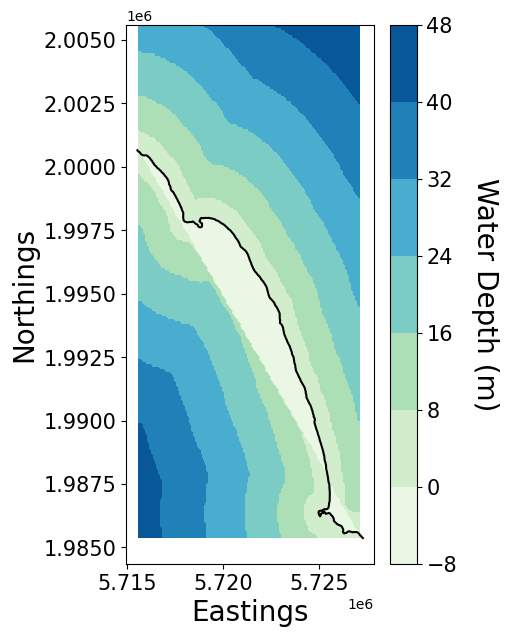

In [4]:
[xg,yg,elev] = utils.shorelinetogrid(x,y,dx,dy,plotdata=True)

In [5]:
# user input from NDBC buoy (make sure buoy has wave height available)
station = 46239
year = np.NAN
year_range = (2014,2024)

H = bp.historic_data(station,year,year_range)
X = H.get_all_stand_meteo()

# get rid of missing data
X.mask((X==99.0) | (X==9999.0), inplace=True)
X.head(3) #preview first 3 lines of table

Appending data from: http://www.ndbc.noaa.gov/view_text_file.php?filename=46239h2014.txt.gz&dir=data/historical/stdmet/


/Users/ryan/Documents/ESPIn/coastal2025/buoypy.py:573: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df)


Appending data from: http://www.ndbc.noaa.gov/view_text_file.php?filename=46239h2015.txt.gz&dir=data/historical/stdmet/


/Users/ryan/Documents/ESPIn/coastal2025/buoypy.py:573: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df)


Appending data from: http://www.ndbc.noaa.gov/view_text_file.php?filename=46239h2016.txt.gz&dir=data/historical/stdmet/


/Users/ryan/Documents/ESPIn/coastal2025/buoypy.py:573: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df)


Appending data from: http://www.ndbc.noaa.gov/view_text_file.php?filename=46239h2017.txt.gz&dir=data/historical/stdmet/


/Users/ryan/Documents/ESPIn/coastal2025/buoypy.py:573: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df)


Appending data from: http://www.ndbc.noaa.gov/view_text_file.php?filename=46239h2018.txt.gz&dir=data/historical/stdmet/


/Users/ryan/Documents/ESPIn/coastal2025/buoypy.py:573: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df)


Appending data from: http://www.ndbc.noaa.gov/view_text_file.php?filename=46239h2019.txt.gz&dir=data/historical/stdmet/


/Users/ryan/Documents/ESPIn/coastal2025/buoypy.py:573: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df)


Appending data from: http://www.ndbc.noaa.gov/view_text_file.php?filename=46239h2020.txt.gz&dir=data/historical/stdmet/


/Users/ryan/Documents/ESPIn/coastal2025/buoypy.py:573: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df)


Appending data from: http://www.ndbc.noaa.gov/view_text_file.php?filename=46239h2021.txt.gz&dir=data/historical/stdmet/


/Users/ryan/Documents/ESPIn/coastal2025/buoypy.py:573: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df)


Appending data from: http://www.ndbc.noaa.gov/view_text_file.php?filename=46239h2022.txt.gz&dir=data/historical/stdmet/


/Users/ryan/Documents/ESPIn/coastal2025/buoypy.py:573: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df)


Appending data from: http://www.ndbc.noaa.gov/view_text_file.php?filename=46239h2023.txt.gz&dir=data/historical/stdmet/


/Users/ryan/Documents/ESPIn/coastal2025/buoypy.py:573: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df)


Appending data from: http://www.ndbc.noaa.gov/view_text_file.php?filename=46239h2024.txt.gz&dir=data/historical/stdmet/


/Users/ryan/Documents/ESPIn/coastal2025/buoypy.py:573: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df)


,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
2014-01-01 00:29:00,NaN,NaN,NaN,2.06,13.33,8.81,301.0,NaN,NaN,12.9,NaN,NaN,NaN
2014-01-01 00:59:00,NaN,NaN,NaN,2.11,13.33,9.24,301.0,NaN,NaN,12.9,NaN,NaN,NaN
2014-01-01 01:29:00,NaN,NaN,NaN,1.96,13.33,8.65,294.0,NaN,NaN,12.8,NaN,NaN,NaN


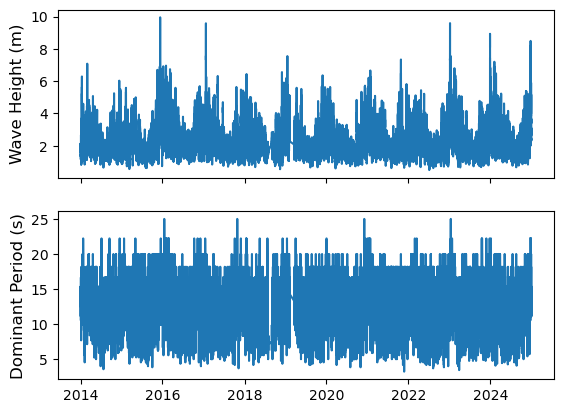

In [6]:
# plot relevant data to check it looks ok
%matplotlib inline
plotdata = True
if plotdata == True: utils.plotmeteo(X)

In [7]:
# extract relevant wave data for CEM
Hs = np.mean(X.WVHT)
Tp = np.mean(X.DPD)
[Dir,count] = stats.mode(X.MWD, keepdims=False, nan_policy='propagate') 

wave_climate = np.array([Hs, Tp, Dir])
np.savetxt('wave_climate_data.txt', wave_climate)

In [8]:
def rotate_shoreline(x,y,angle='auto'):
    '''This function takes points (x,y) and rotates them by an angle
    The angle is automatically generated by the end points of the shorelines coordinates
    If this approach doesnt work for some reason you may input an angle maually (in degrees).'''
    
    if angle == 'auto':
        sign = -1 if y[-1]>y[0] else 1
        a = sign*np.arctan((y[-1]-y[0])/(x[-1]-x[0]))
    else:
        a = angle*np.pi/180
    # using this roation matix
    xnew = (x ) * np.cos(a) - (y ) * np.sin(a)  
    ynew = (x ) * np.sin(a) + (y ) * np.cos(a) 
    return xnew,ynew


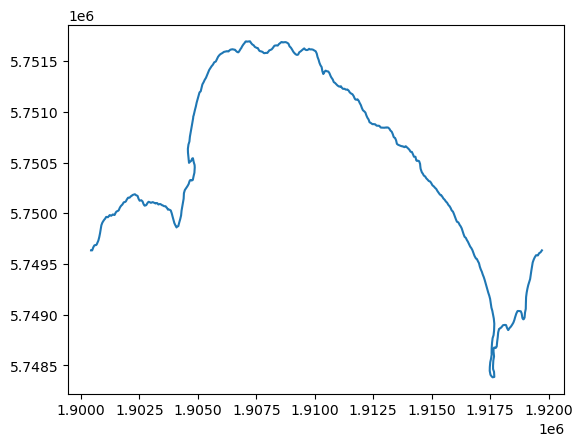

In [9]:

xnew,ynew = rotate_shoreline(x,y)

# check the orentation by uncommenting the line below
plt.plot(xnew,ynew);

# if it isnt right, input an angle into the function above and rotate manually
# if it looks good, run the cell below

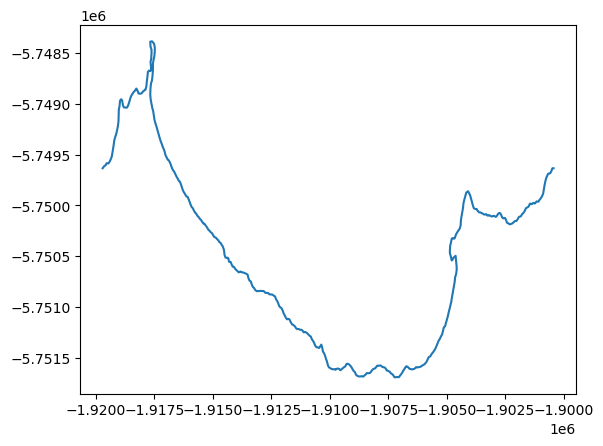

In [10]:
reflected = np.array([-xnew, -ynew])

plt.plot(reflected[0], reflected[1])
plt.show()

In [11]:
x,y = reflected[0], reflected[1]

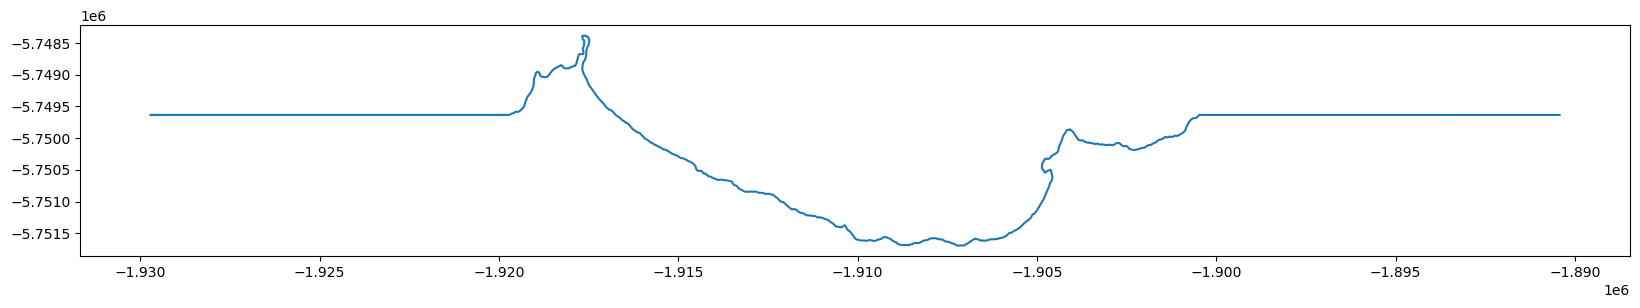

In [12]:
def extend_shoreline(x,y,length):
    '''Extend the length of the shoreline by an amount, "length", on each end.'''
    XL = int(length)
    dx=length//100
    x = np.append(x,np.arange(x[-1],x[-1]+XL+dx,dx))
    y = np.append(y,np.ones([abs(len(y)-len(x))])*y[-1])
    x = np.append(np.flip(x),np.arange(x[0]-XL,x[0]-1,dx))
    y = np.append(np.flip(y),np.ones([abs(len(y)-len(x))])*y[0])
    return x,y
xnew,ynew = extend_shoreline(x,y,1e4)

# check the shoreline by uncommenting the lines below
plt.figure(figsize=(20,3));
plt.plot(xnew,ynew);

# If it isnt right, you might want to do this manually. 
# If the shoreline is already pretty long you may ignore this step
# If it looks good, run the cell below

In [13]:
x,y = xnew,ynew

In [22]:
from matplotlib import path

def shorelinetogrid(x, y, dx, dy, plotdata=True):
    """ function to convert xy shoreline to gridded elevation for input to CEM
        takes arrays of x and y in UTM or lat lon values. Assumes a Dean Profile.
        Will plot output unless specified plotdata=False
            """
    # build grid
    # find the smallest and largest x's and y's to initialize grid boundaries
    x0 = int(np.ceil(min(x) / dx) * dx)
    y0 = int(np.ceil(min(y) / dy) * dy)
    x1 = x0 + int(np.ceil((max(x) - min(x)) / dx) * dx - 2 * dx)  # add total length of x to origin x
    y1 = y0 + int(np.ceil((max(y) - min(y)) / dy) * dy + 5000)

    # create mesh grid of x and y
    [xg, yg] = np.meshgrid(list(range(x0, x1, dx)), list(range(y0, y1, dy)), sparse=False, indexing='ij')

    # generate bathy using dean profile
    surf_width = 1000
    A = 0.1
    landmax = 1
    rng = 100000
    zg = np.zeros_like(xg)
    dist = np.zeros_like(xg)

    for i in range(0, xg.shape[1]):
        for j in range(0, xg.shape[0]):
            inrange = (abs(x - xg[j, i]) < rng) & (abs(y - yg[j, i]) < rng);
            r = np.zeros_like(x);
            r[inrange] = (x[inrange] - xg[j, i]) ** 2 + (y[inrange] - yg[j, i]) ** 2;
            r[~inrange] = 1.e10;
            # Compute closest grid cell
            value = min(r);
            dist[j, i] = np.sqrt(value);
            zg[j, i] = -A * (dist[j, i]) ** (2 / 3);

    p = path.Path(np.transpose([x, y]))
    IN = p.contains_points(np.transpose([xg.flatten(), yg.flatten()]))
    IN = IN.reshape(xg.shape)
    # zg[IN] = (min(A * (dist[IN]) ** (2 / 3))) + 1
    zg = zg * -1
    if plotdata == True:
        M,N = zg.shape
        s = M/N
        plt.figure(figsize=(int(s*8),7))
        Bathy = plt.contourf(xg, yg, zg, cmap=plt.cm.GnBu)
        cbar = plt.colorbar(Bathy)
        cbar.ax.set_ylabel('Water Depth (m)', fontsize=20, rotation=-90, labelpad=30)
        plt.xlabel('Eastings', fontsize=20)
        plt.ylabel('Northings', fontsize=20)
        plt.tick_params('both', labelsize=15)
        cbar.ax.tick_params('y', labelsize=15)
        Shore = plt.plot(x, y, 'k')
    return xg, yg, zg

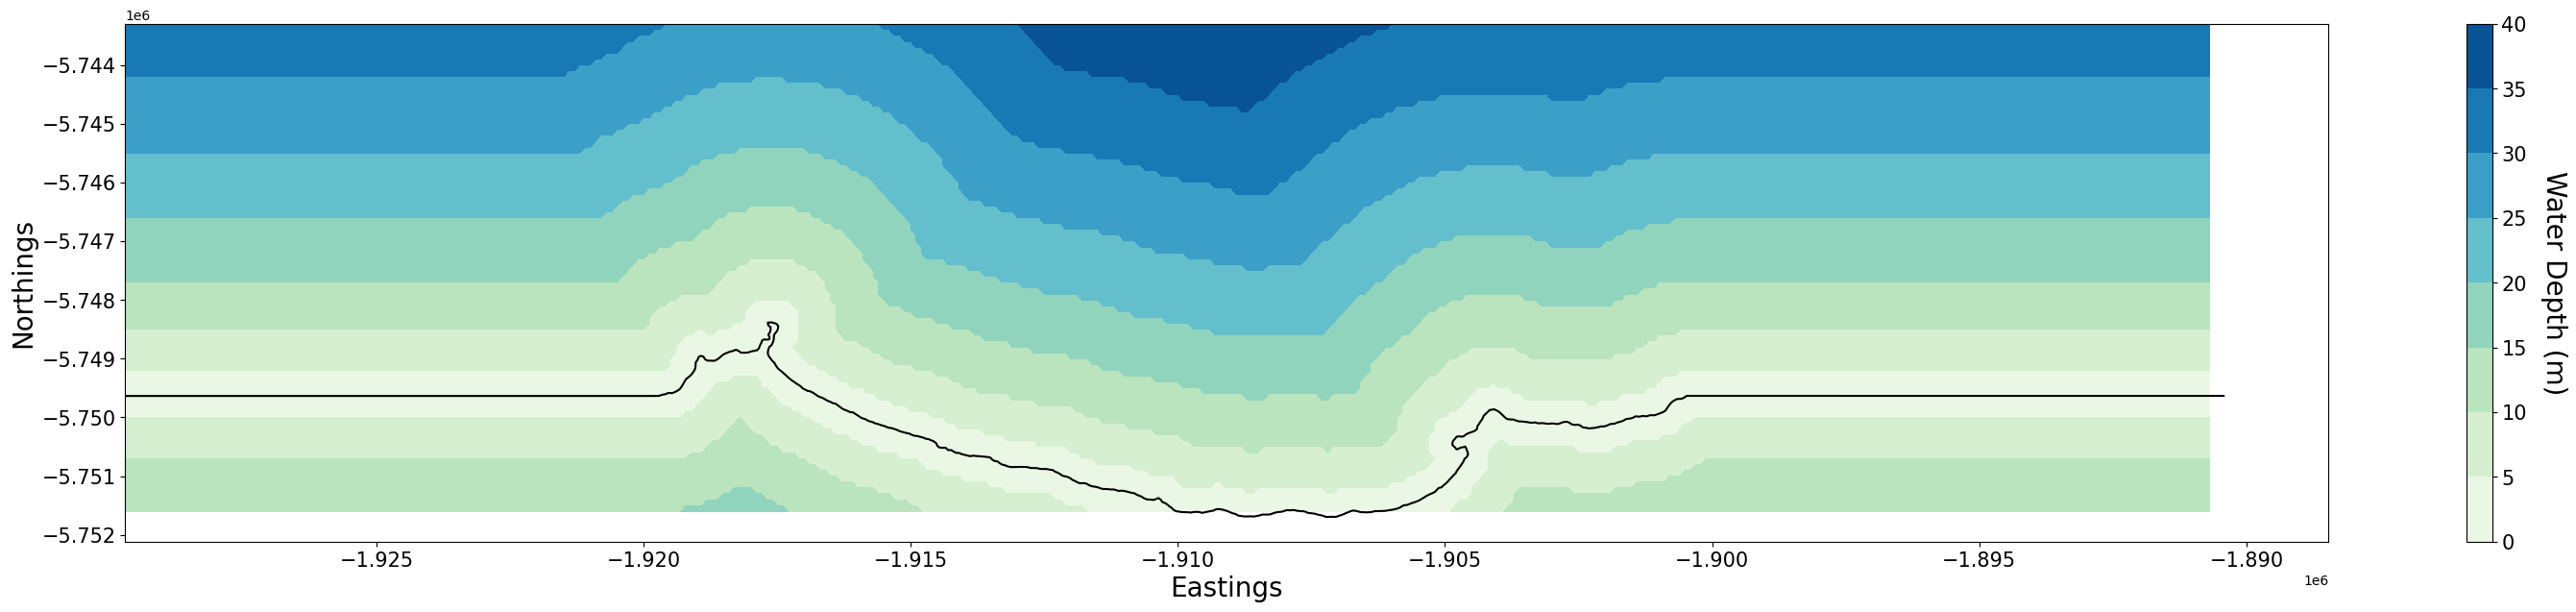

In [190]:
# If the number of x,y data points is large this may take a few minutes...
[xg,yg,elev] = shorelinetogrid(x,y,dx,dy,plotdata=True);

In [191]:
import numpy as np
from scipy.spatial import cKDTree


# Assume xg, yg, elev, x, y are already defined and shaped appropriately
# Flatten grid for vectorized nearest neighbor search
grid_points = np.column_stack((xg.ravel(), yg.ravel()))
line_points = np.column_stack((x, y))

# Use scipy for efficient nearest neighbor search

tree = cKDTree(grid_points)
_, indices = tree.query(line_points)

# Convert 1D flat indices back to 2D indices
rows, cols = np.unravel_index(indices, xg.shape)

# Set elevation to 999 at those locations
shoreline = elev.copy()
shoreline[rows, cols] = 999


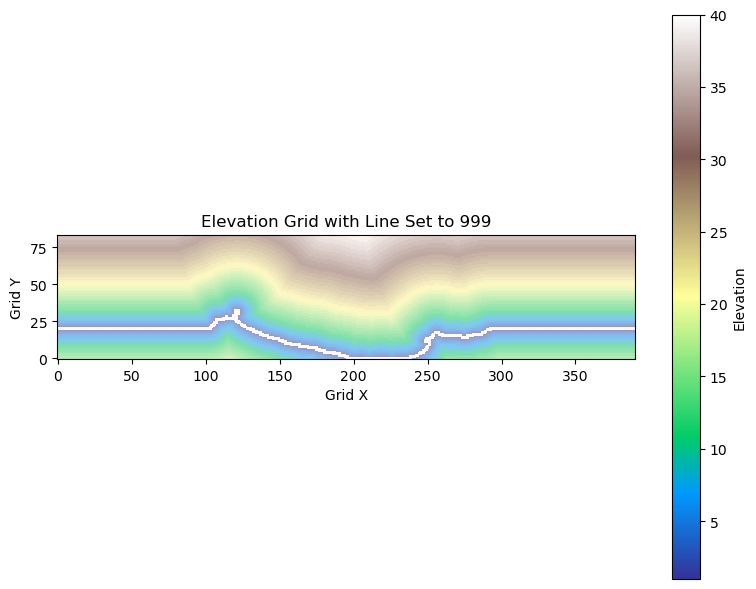

In [192]:
# Mask the 999s so they don't affect the colormap scaling
masked_elev = np.ma.masked_where(shoreline == 999, elev)

plt.figure(figsize=(8, 6))
im = plt.imshow(masked_elev.T, origin='lower', cmap='terrain')
plt.colorbar(im, label='Elevation')

# Overlay the 999 line in red
plt.imshow((elev.T == 999), origin='lower', cmap='Reds', alpha=0.5)

plt.title('Elevation Grid with Line Set to 999')
plt.xlabel('Grid X')
plt.ylabel('Grid Y')
plt.tight_layout()
plt.show()

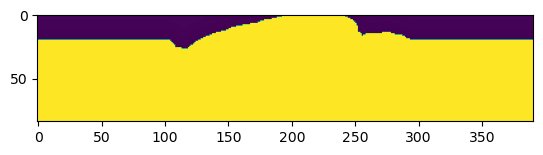

In [200]:
plt.imshow(shoreline_outline)

In [68]:
xg.shape

(391, 84)

In [93]:
## defining the set_domain function so that we can easily re-initialize our domain after model runs

def set_domain(pad=20):
    z_elev = elev.T # transpose of the elevations for CEM/plotting purposes

    z_elev[z_elev==-5] = -1 ## -5 is the "shoreline" flag from above.
    domain = -1*z_elev ## we want the domain to have values above sea-level to be >0 and below <0


    ##Trial and error steps:

    ## smooth the depths by averaging each cell in the domain by NxN of its neighbors
    neighs = np.ones([10,10])
    total = (10**2)
    domain = signal.convolve2d(domain,neighs/total,mode='same',boundary='symm')

    domain[z_elev==0] = 1 ## our shoreline got smoothed out too. This fixes that and makes sure our land is at 1m above sea level


    N,M = domain.shape
    domnew = np.ones([N+pad,M]) ##here we add a "pad" to the bottom of the domain
    domnew[-N:,:] = domain # if this is undesirable, set "pad=0"
    domain = domnew
    
    return domain

domain= set_domain(pad=20)

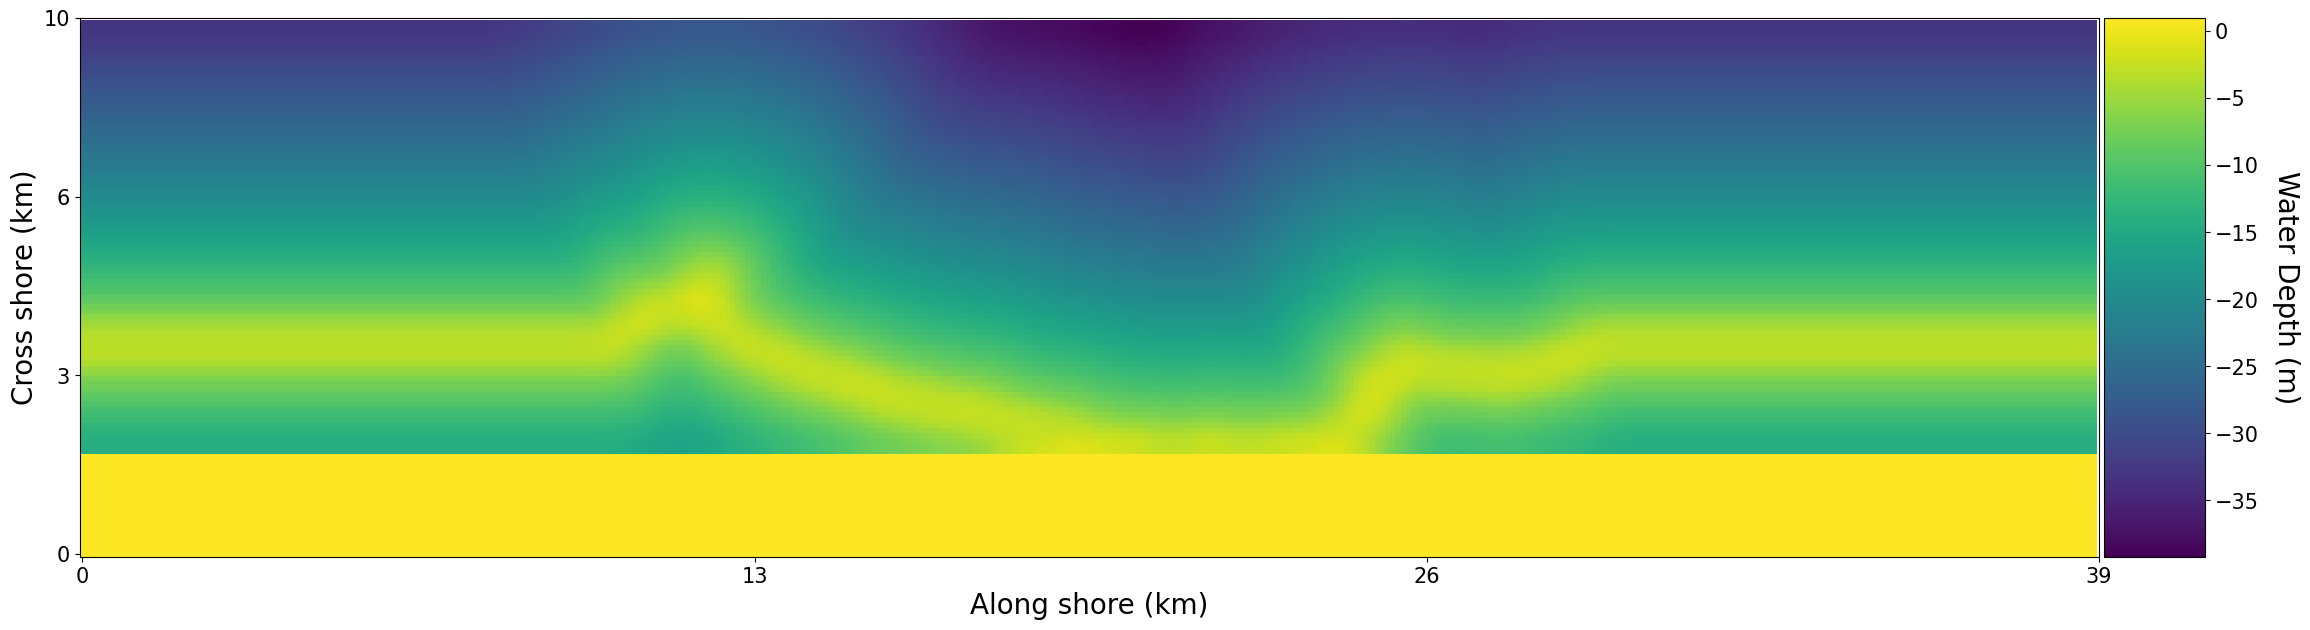

In [64]:
plot_coast(domain,dx,dy)

In [95]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_coast(domain,dx,dy):
    '''Plot the coastline.
    
    Inputs:
    ------
    domain = any 2D array (though colorbar label is specific for water depth)
    
    '''
    N,M = domain.shape
    s = M/N
    fig,ax = plt.subplots(figsize=(int(s*8),7))
    im = ax.imshow(domain, origin='lower', cmap='viridis')
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cb = fig.colorbar(im,cax=cax)
    cb.ax.tick_params('both',labelsize=15)
    cb.ax.set_ylabel('Water Depth (m)',fontsize=20,rotation=-90, labelpad=30)
    y = np.linspace(0,N,4)
    x = np.linspace(0,M,4)
    Y = (y*dy/(1000)).astype('int')
    X = np.asarray(x*dx/(1000)).astype('int')
    ax.set_yticks(y)
    ax.set_xticks(x)
    ax.set_yticklabels(Y)
    ax.set_xticklabels(X)
    ax.set_xlabel('Along shore (km)',fontsize=20)
    ax.set_ylabel('Cross shore (km)',fontsize=20)
    ax.tick_params('both',labelsize=15)

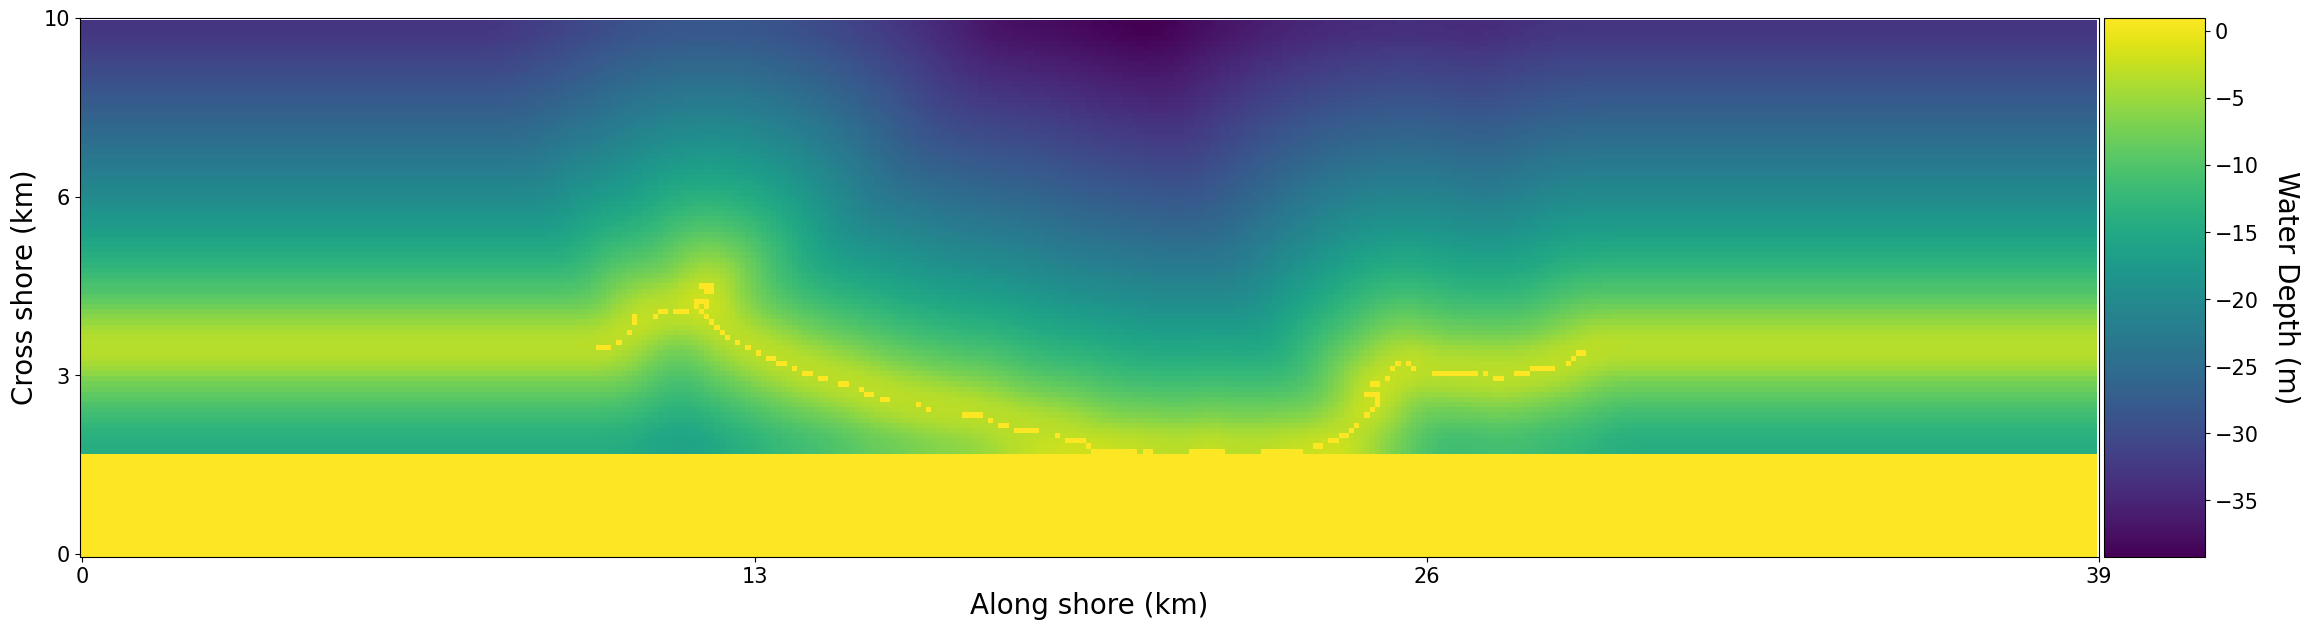

In [96]:
plot_coast(domain,dx,dy)

In [97]:
import numpy as np

def fill_columns_below_line(x, y, xg, yg, elev):
    """
    Fills elevation grid by setting to 1 all values below each (x, y) point.
    For columns with multiple points, fills from the second-highest to the highest
    and from the lowest to the bottom of the domain.

    Parameters:
        x, y      : 1D arrays of points in physical space
        xg, yg    : 2D meshgrid arrays (xg.T, yg.T) for transposed layout
        elev      : 2D array of elevation values (same shape as xg, yg)

    Returns:
        modified_elev : Elevation array with filled regions set to 1
    """
    modified_elev = elev.copy()
    nrows, ncols = elev.shape

    # Get column indices for each x by finding nearest xg
    col_coords = xg[0, :]  # Assumes xg is constant along rows (transposed meshgrid)
    col_indices = np.argmin(np.abs(x[:, None] - col_coords[None, :]), axis=1)

    # Map y to row indices (again, because of transposed meshgrid)
    row_coords = yg[:, 0]  # Assumes yg is constant along columns
    row_indices = np.argmin(np.abs(y[:, None] - row_coords[None, :]), axis=1)

    from collections import defaultdict
    col_to_rows = defaultdict(list)
    for col_idx, row_idx in zip(col_indices, row_indices):
        col_to_rows[col_idx].append(row_idx)

    for col_idx, rows in col_to_rows.items():
        rows = sorted(rows)  # From top (small row index) to bottom (large)
        if len(rows) == 1:
            modified_elev[rows[0]:, col_idx] = 1
        else:
            # Fill from second-highest to highest
            modified_elev[rows[-2]:rows[-1]+1, col_idx] = 1
            # Fill from lowest point to bottom
            modified_elev[rows[0]:, col_idx] = 1

    return modified_elev


In [98]:
modified_elev = fill_columns_below_line(x, y, xg, yg, elev)

In [81]:
## defining the set_domain function so that we can easily re-initialize our domain after model runs

def set_domain(pad=20):
    z_elev = modified_elev.T # transpose of the elevations for CEM/plotting purposes

    z_elev[z_elev==1] = -1 ## -5 is the "shoreline" flag from above.
    domain = -1*z_elev ## we want the domain to have values above sea-level to be >0 and below <0


    ##Trial and error steps:

    ## smooth the depths by averaging each cell in the domain by NxN of its neighbors
    neighs = np.ones([10,10])
    total = (10**2)
    domain = signal.convolve2d(domain,neighs/total,mode='same',boundary='symm')

    domain[z_elev==0] = 1 ## our shoreline got smoothed out too. This fixes that and makes sure our land is at 1m above sea level


    N,M = domain.shape
    domnew = np.ones([N+pad,M]) ##here we add a "pad" to the bottom of the domain
    domnew[-N:,:] = domain # if this is undesirable, set "pad=0"
    domain = domnew
    
    return domain

domain= set_domain(pad=20)

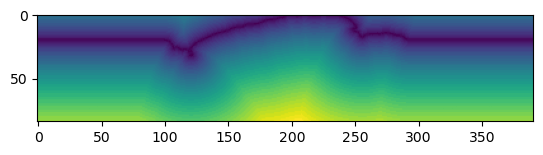

In [99]:
plt.imshow(elev.T)

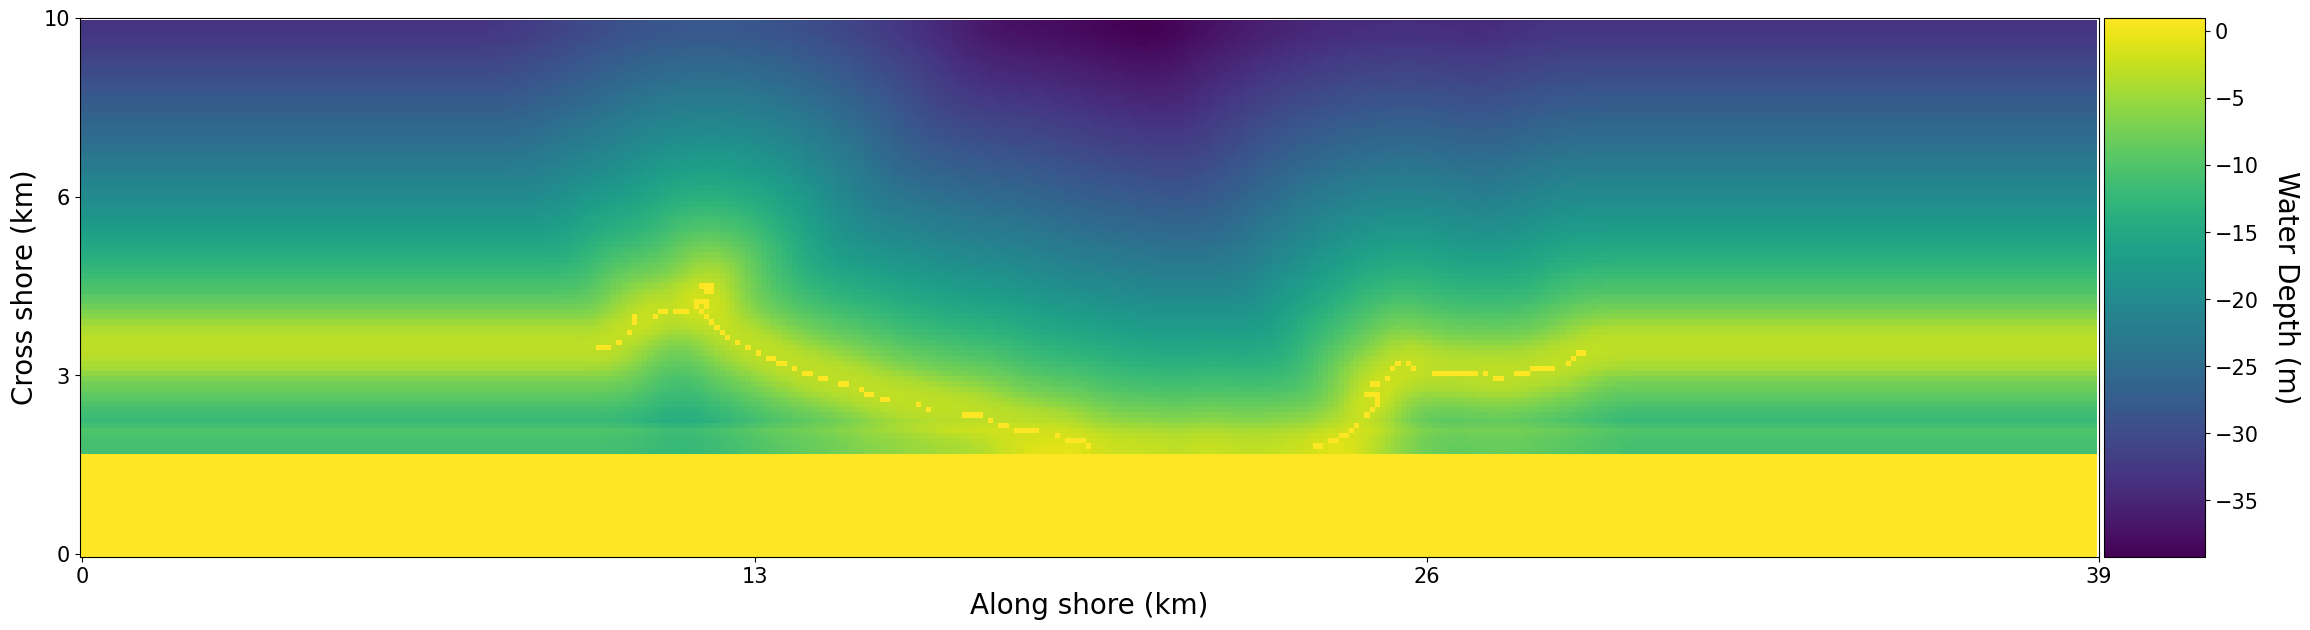

In [90]:
plot_coast(domain,dx,dy)